Data Import

In [1]:
import requests
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
conversion_data = pd.read_csv('KAG_conversion_data.csv')   
conversion_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
# checking for types/irregularities 
conversion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
# there are as many ad ids as observations and can therefore be dropped. Did the same fore FB campaign ids
conversion_data.drop(['ad_id'], axis = 1, inplace = True)
conversion_data.drop(['fb_campaign_id'], axis = 1, inplace = True)
conversion_data

,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,916,30-34,M,15,7350,1,1.430000,2,1
1,916,30-34,M,16,17861,2,1.820000,2,0
2,916,30-34,M,20,693,0,0.000000,1,0
3,916,30-34,M,28,4259,1,1.250000,1,0
4,916,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...
1138,1178,45-49,F,109,1129773,252,358.189997,13,2
1139,1178,45-49,F,110,637549,120,173.880003,3,0
1140,1178,45-49,F,111,151531,28,40.289999,2,0
1141,1178,45-49,F,113,790253,135,198.710001,8,2


In [5]:
spent = conversion_data['Spent'].sum()
round(spent)

58705

In [6]:
Impressions = conversion_data['Impressions'].sum()
Impressions

213434828

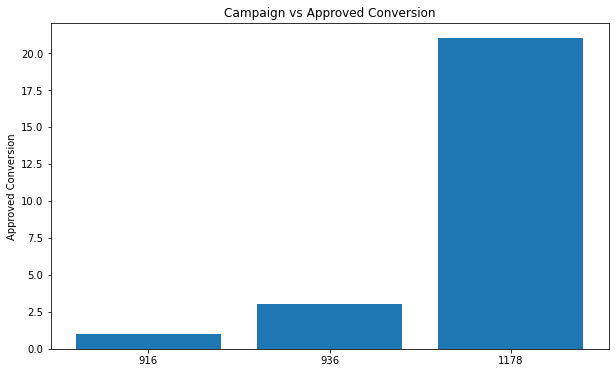

<Figure size 432x288 with 0 Axes>

In [7]:
#Approved_Conversion
fig=plt.figure(figsize=(10,6))
plt.bar(conversion_data["xyz_campaign_id"].astype(str), conversion_data["Approved_Conversion"])
plt.ylabel("Approved Conversion")
plt.title("Campaign vs Approved Conversion")
plt.show()
plt.savefig("campaign_bar.png")

From the graph we can see that campaign 1178 has the highest approved conversions which means people are mostly buying things though this campign

Gender

In [8]:
gender = conversion_data['gender'].value_counts()
gender

M    592
F    551
Name: gender, dtype: int64

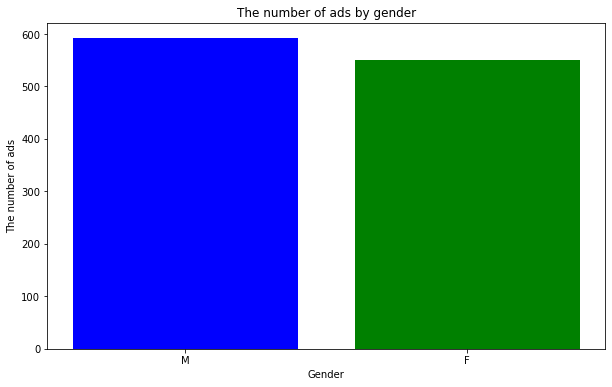

<Figure size 432x288 with 0 Axes>

In [9]:
fig=plt.figure(figsize=(10,6))
gender = conversion_data['gender'].value_counts()
plt.bar(gender.index.values,gender.values,  color=['blue','green'])
plt.xlabel('Gender')
plt.ylabel('The number of ads')
plt.title('The number of ads by gender')
plt.show();
plt.savefig("gender_bar.png")

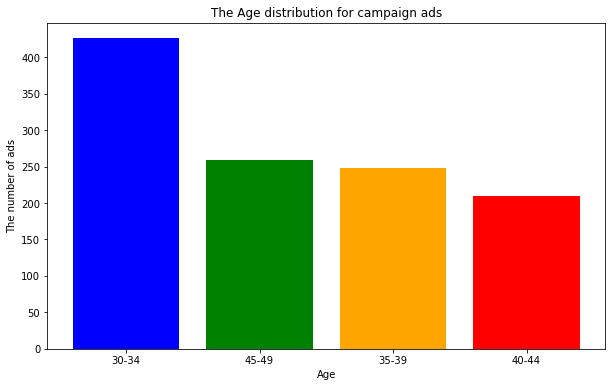

<Figure size 432x288 with 0 Axes>

In [10]:
fig=plt.figure(figsize=(10,6))
ages = conversion_data['age'].value_counts()
plt.bar(ages.index.values,ages.values, color=['blue','green','orange','red'])
plt.xlabel('Age')
plt.ylabel('The number of ads')
plt.title('The Age distribution for campaign ads')
plt.show()
plt.savefig("age dis of campaign.png")


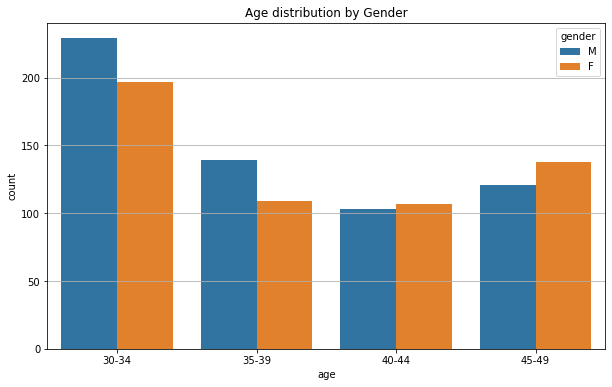

In [11]:
fig=plt.figure(figsize=(10,6))
sns.countplot(data=conversion_data, x='age', hue='gender')
plt.title('Age distribution by Gender')
plt.grid(axis='y')
plt.savefig("age by gender.png")

Based on both graphs both genders have the same intrest but people in the age range 30-34 show the most intrest in the ad campaigns

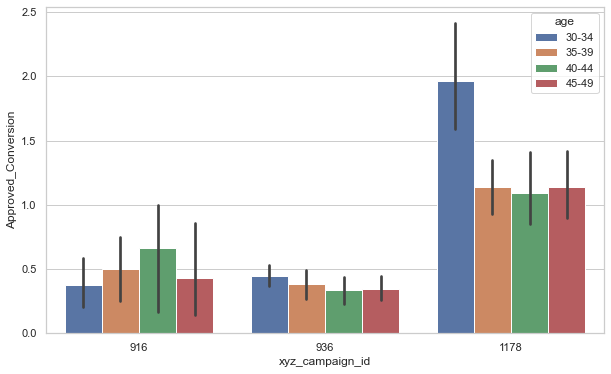

In [12]:
fig=plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=conversion_data["xyz_campaign_id"], y=conversion_data["Approved_Conversion"], hue=conversion_data["age"], data=tips)
plt.savefig("age vs campaign.png")

Campaign Ads

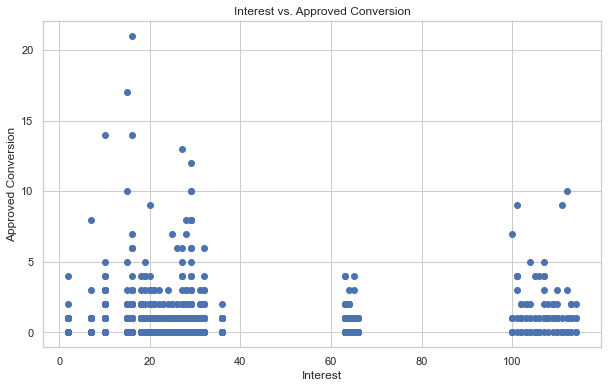

<Figure size 432x288 with 0 Axes>

In [13]:
fig=plt.figure(figsize=(10,6))
plt.scatter(conversion_data["interest"], conversion_data["Approved_Conversion"])
plt.title("Interest vs. Approved Conversion")
plt.xlabel("Interest")
plt.ylabel("Approved Conversion")
plt.show()
plt.savefig("interest vs approved.png")

<Figure size 720x432 with 0 Axes>

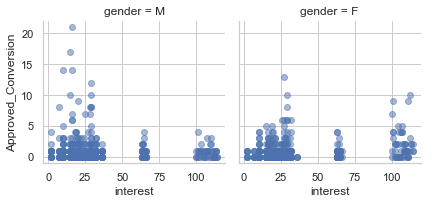

In [15]:
fig=plt.figure(figsize=(10,6))
c = sns.FacetGrid(conversion_data,  col="gender" )
c.map(plt.scatter, "interest", "Approved_Conversion", alpha=.5)
c.add_legend()
plt.savefig("age interest approved.png")

In [16]:
# total number of clicks
clicks = conversion_data['Clicks'].sum()
clicks

38165

In [17]:
#Total_Conversion
Total_Conversion = conversion_data['Total_Conversion'].sum()
Total_Conversion

3264

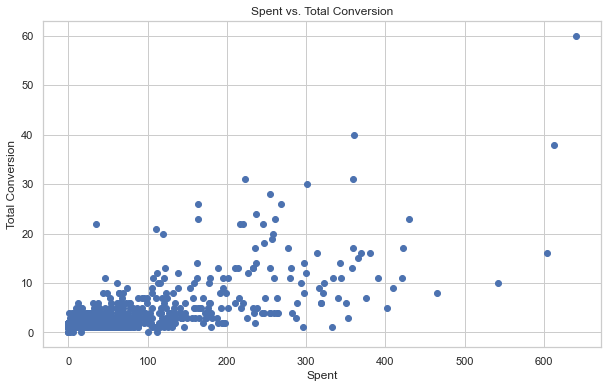

<Figure size 432x288 with 0 Axes>

In [18]:
#spent vs total conversion 
fig=plt.figure(figsize=(10,6))
plt.scatter(conversion_data["Spent"], conversion_data["Total_Conversion"])
plt.title("Spent vs. Total Conversion")
plt.xlabel("Spent")
plt.ylabel("Total Conversion")
plt.show()
plt.savefig("spent vs total.png")

In [19]:
#Approved_Conversion
Approved_Conversion = conversion_data['Approved_Conversion'].sum()
Approved_Conversion

1079

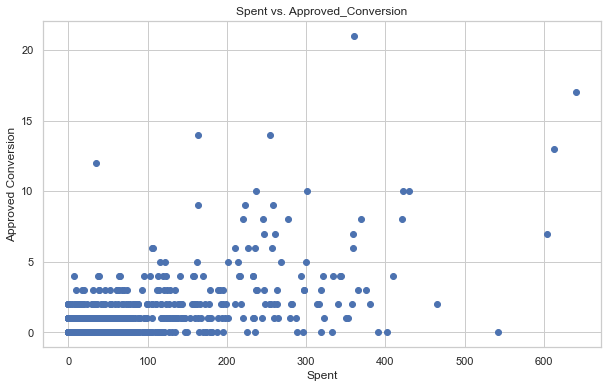

<Figure size 432x288 with 0 Axes>

In [20]:
#spent vs approved 
fig=plt.figure(figsize=(10,6))
plt.scatter(conversion_data["Spent"], conversion_data["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved Conversion")
plt.show()
plt.savefig("spent vs approved.png")